# K-Nearest Neighbours

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Loading data
zoo=pd.read_csv('Zoo.csv')
# General inspection
zoo.head()
zoo.info()
zoo.describe()
zoo.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [8]:
# Data Preprocessing
zoo['type'].nunique()
zoo.isnull().sum()
zoo[zoo.duplicated()]
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


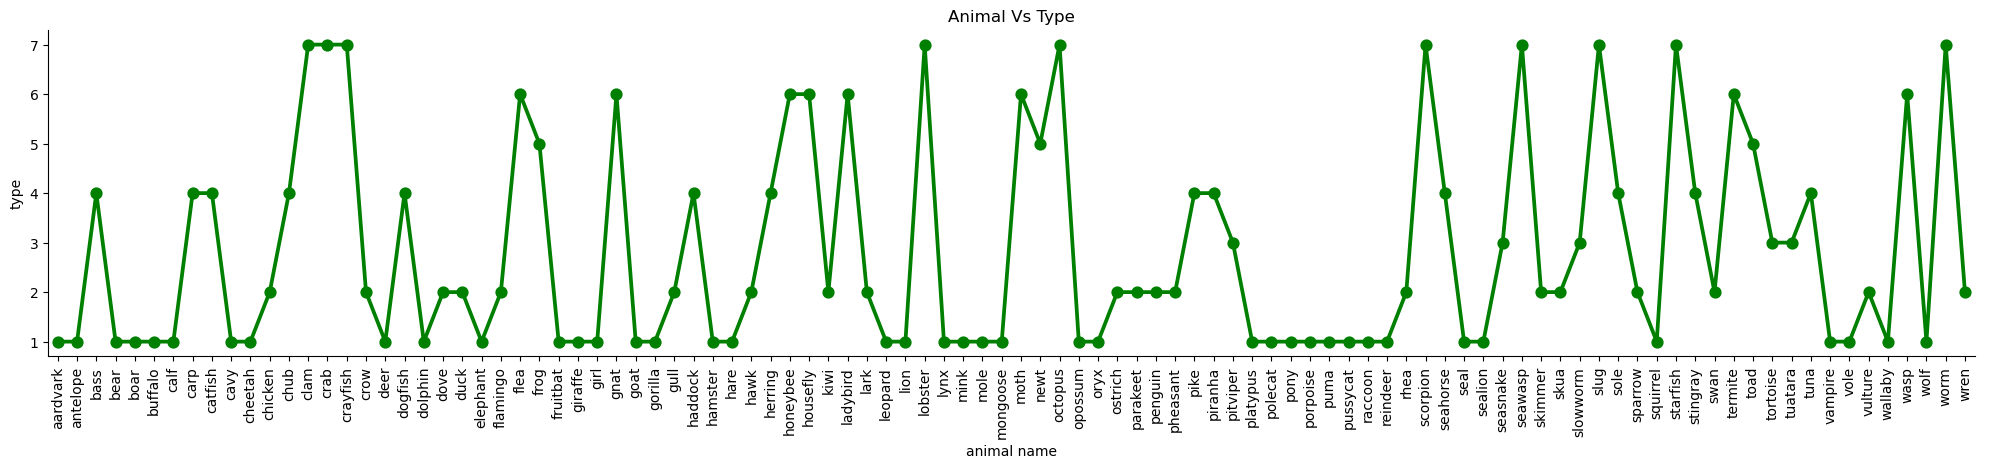

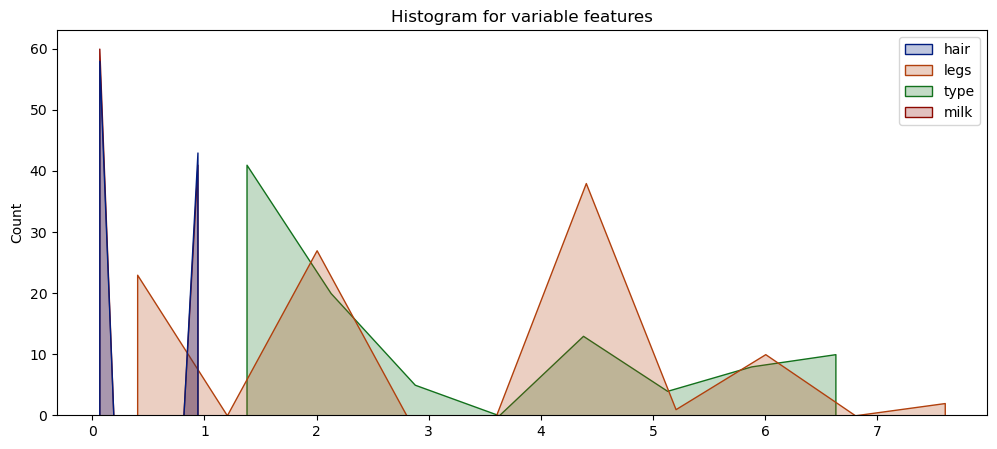

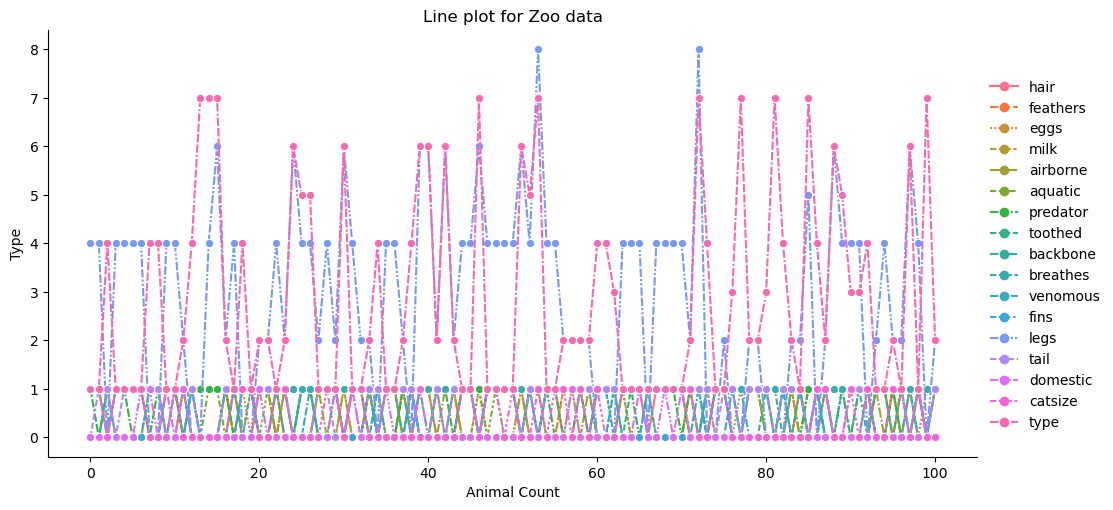

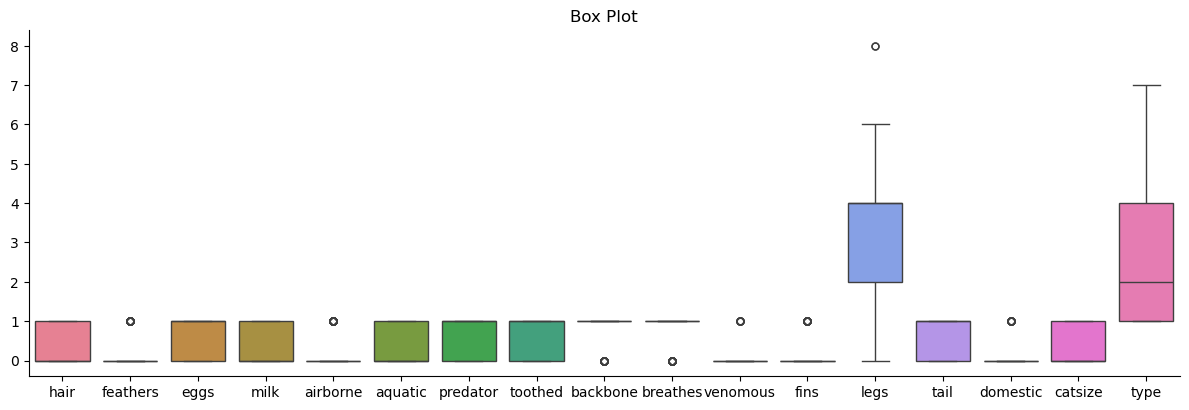

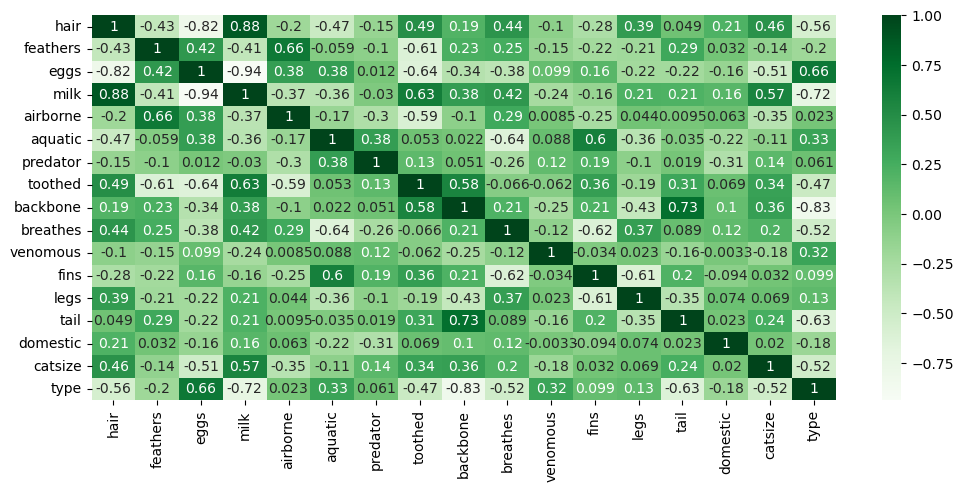

In [9]:
# Data Visualization
# Point plot on Zoo data
sns.catplot(zoo,x=zoo['animal name'],y=zoo['type'],kind='point',height=4,aspect=5,color='g')
plt.title('Animal Vs Type')
plt.xticks(rotation=90)
plt.show()
# Histogram for Variable features
plt.figure(figsize=(12,5))
sns.histplot(zoo[['hair','legs','type','milk']],common_bins=False,element='poly',palette='dark')
plt.title('Histogram for variable features')
plt.show()
# Line plot for checking trend
sns.relplot(zoo,kind='line',height=5,aspect=2,markers='o')
plt.title('Line plot for Zoo data')
plt.xlabel('Animal Count')
plt.ylabel('Type')
plt.show()
# Box plot for ouliers detection
sns.catplot(zoo,kind='box',height=4,aspect=3)
plt.title('Box Plot')
plt.show()
# Droping Unwanted columns
zoo.drop('animal name',axis=1,inplace=True)
# Ploting Corelation heat Map
plt.figure(figsize=(12,5))
sns.heatmap(zoo.corr(),cmap='Greens',annot=True)
plt.show()

In [10]:
# Scaling Data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
zoo_arr=scaler.fit_transform(zoo.iloc[:,:-1])
zoo_sc=pd.DataFrame(zoo_arr,columns=zoo.iloc[:,:-1].columns)
zoo_=zoo_sc.join(zoo.iloc[:,-1])
zoo_

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,7


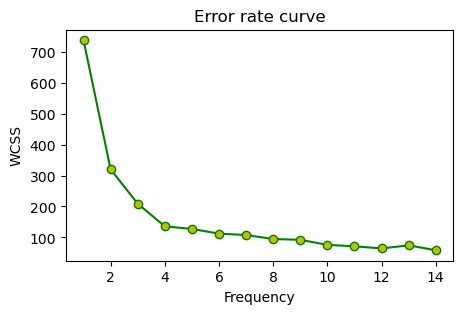

Classification report for Training Data
  
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.95      1.00      0.97        18
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       0.62      1.00      0.77         5
           7       1.00      0.67      0.80         9

    accuracy                           0.95        80
   macro avg       0.94      0.92      0.91        80
weighted avg       0.96      0.95      0.95        80

Classification report for Testing Data
  
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00    

In [14]:
# Spliting data into Train & test
from sklearn.model_selection import train_test_split
X=zoo_.iloc[:,:-1]
y=zoo_.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# Finding best K values 
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(zoo_)
    wcss.append(model.inertia_)
# Ploting Error rate curve
plt.figure(figsize=(5,3))
plt.plot(range(1,15),wcss,marker='o',color='g',mfc='y')
plt.title('Error rate curve') 
plt.xlabel('Frequency')
plt.ylabel('WCSS')
plt.show()
# Training model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8,metric='euclidean')
model.fit(X_train,y_train)
# Evaluating model with Xtrain values
yhat_train=model.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# Checking for scores of accuracy,f1score and recall
confusion_matrix(y_train,yhat_train)
print('Classification report for Training Data')
print('  ')
print(classification_report(y_train,yhat_train))
# Predecting values for Xtest data
yhat_test=model.predict(X_test)
confusion_matrix(y_test,yhat_test)
print('Classification report for Testing Data')
print('  ')
print(classification_report(y_test,yhat_test))


Decision boundary visualization only works with 2D feature space. Reduce dataset to 2 features for plotting.


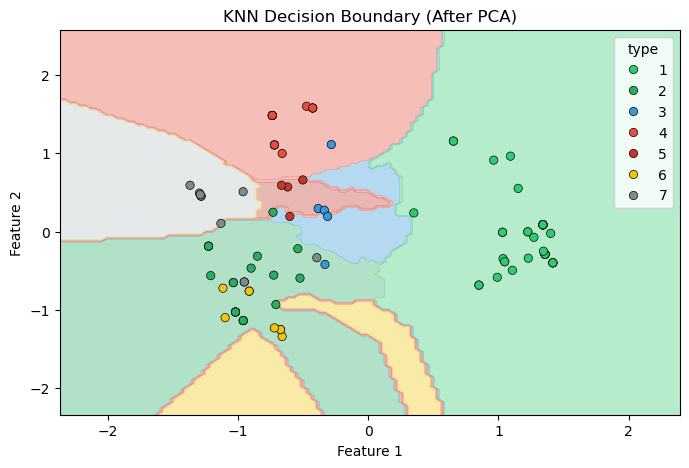

In [22]:
from matplotlib.colors import ListedColormap
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title='KNN Decision Boundary'):
    h = 0.04
    cmap_light = ListedColormap(['#82e0aa','#7dcea0','#85c1e9','#f1948a','#d98880','#f7dc6f','#d5dbdb'])
    cmap_bold = ['#2ecc71','#27ae60','#3498db','#e74c3c','#c0392b','#f1c40f','#7f8c8d']

    # Define the feature space limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Scatter plot of actual data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor="k", legend=True)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

if X.shape[1] == 2:
    plot_decision_boundary(X, y, knn)
else:
    print("Decision boundary visualization only works with 2D feature space. Reduce dataset to 2 features for plotting.")

# Using PCA
from sklearn.decomposition import PCA
# Reduce dataset to 2 principal components
pca = PCA(n_components=2,random_state=42)
X_reduced = pca.fit_transform(X)
# Train KNN on reduced data
knn_reduced = KNeighborsClassifier(n_neighbors=8,metric='euclidean',n_jobs=-1)  # You can adjust K value
knn_reduced.fit(X_reduced, y)
# Plot decision boundary for reduced dataset
plot_decision_boundary(X_reduced, y, knn_reduced, title='KNN Decision Boundary (After PCA)')

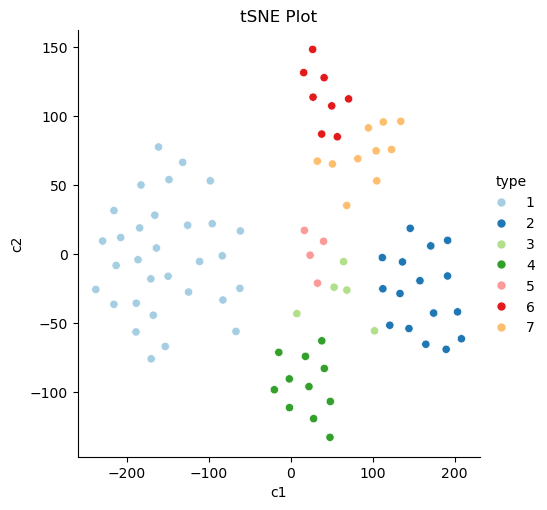

In [26]:
# Using tSNE for Data disperpersion visualization
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tarr=tsne.fit_transform(X)
tdf=pd.DataFrame(tarr,columns=['c1','c2'])
tdf['type']=y
sns.relplot(tdf,x='c1',y='c2',kind='scatter',hue='type',palette='Paired')
plt.title('tSNE Plot')
plt.show()

### Interview Questions
    1. Key Hyperparameters in KNN:
    
        1.n_neighbors (k) – The number of nearest neighbors to consider; a small k captures local variations, while a large k smooths predictions.
        2.metric – The distance function used to measure similarity, such as Euclidean, Manhattan, or Minkowski.
        3.weights – Determines how neighbors contribute to classification/regression; options include "uniform" (equal weight) and "distance" (weighted          by inverse distance).
        4.algorithm – The method for finding nearest neighbors, such as "brute" (exhaustive search) or "kd_tree" and "ball_tree" (faster for large data sets)
        5.leaf_size – Affects the speed-accuracy tradeoff in tree-based searches; smaller values yield more precise results but increase computation             time.
    2.Distance Metrics used in KNN are follows :
        1.Euclidean Distance
        2.Manhattan Distance
        3.Minkowski Distance
        4.Cosine similarity
        5.Hamming Distance
        6.Chebyshev Distance